#### Datacleaning

In [365]:
import numpy as np
import pandas as pd
import missingno
%matplotlib inline

In [366]:
df = pd.read_csv("reviews.csv")

In [367]:
df.head(5)

,Unnamed: 0,author,company,cons,date,employee_type,location,pros,text,title,compensation_rating,culture_rating,globalreview_count,jobsecurity_rating,mgmt_rating,overall,worklife_rating
0,0,"Sales and Marketing, Sales Support Associate",Berkshire Hathaway,no room for growth,"April 23, 2013","Sales and Marketing, Sales Support Associate (...","New York, NY","helpful, energetic and friendly working enviro...",Learned to grow into a leadership role and men...,Motivating Workplace,3.8,4.0,Based on 104 reviews,3.6,3.9,4.1,4.0
1,1,NaN,Berkshire Hathaway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,4.0,Based on 104 reviews,3.6,3.9,4.1,4.0
2,2,Realtor,Berkshire Hathaway,NaN,"September 26, 2018",Realtor (Current Employee) –,"Bonita Springs, FL",NaN,Berkshire is the top real estate company in th...,Top Company,3.8,4.0,Based on 104 reviews,3.6,3.9,4.1,4.0
3,3,Assistant,Berkshire Hathaway,NaN,"September 3, 2018",Assistant (Former Employee) –,"Moreland Hills, OH",Great hours. Good people.,Working at Berkshire Hathaway taught me what i...,What I learned,3.8,4.0,Based on 104 reviews,3.6,3.9,4.1,4.0
4,4,UPS Driver Helper,Berkshire Hathaway,Takes a toll on Your body,"August 22, 2018",UPS Driver Helper (Former Employee) –,"Omaha, NE",Its a workout,Sometimes when i worked there i felt like i wa...,Can be fun and competitive,3.8,4.0,Based on 104 reviews,3.6,3.9,4.1,4.0


In [368]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [369]:
df.dtypes

author                  object
company                 object
cons                    object
date                    object
employee_type           object
location                object
pros                    object
text                    object
title                   object
compensation_rating    float64
culture_rating         float64
globalreview_count      object
jobsecurity_rating     float64
mgmt_rating            float64
overall                float64
worklife_rating        float64
dtype: object

#### Following can be done to clean the data:
-  Date needs to be converted to Date format. Day, month,year needs to be identified. 
-  Employee type can be former or current
-  Location can be split to City and State columns
-  Global reviews can just be a integer value

In [370]:
df.dtypes

author                  object
company                 object
cons                    object
date                    object
employee_type           object
location                object
pros                    object
text                    object
title                   object
compensation_rating    float64
culture_rating         float64
globalreview_count      object
jobsecurity_rating     float64
mgmt_rating            float64
overall                float64
worklife_rating        float64
dtype: object

##### Percentage missing values in df


In [371]:
(100*df.isnull().sum()/len(df)).sort_values(ascending = False)

cons                   60.485078
pros                   58.019762
title                  13.344645
author                 13.254816
text                   13.244835
location               13.244835
employee_type          13.244835
date                   13.244835
worklife_rating         4.581296
mgmt_rating             4.581296
jobsecurity_rating      4.581296
globalreview_count      4.581296
culture_rating          4.581296
compensation_rating     4.581296
overall                 0.000000
company                 0.000000
dtype: float64

##### Observation on missing values:
-  we can ignore missing values in cons, pros
-  we notice the title,author,text,location,employee_type,date are missing in equal number of columns
-  Are they missing in the same rows? To find this use Missingno package

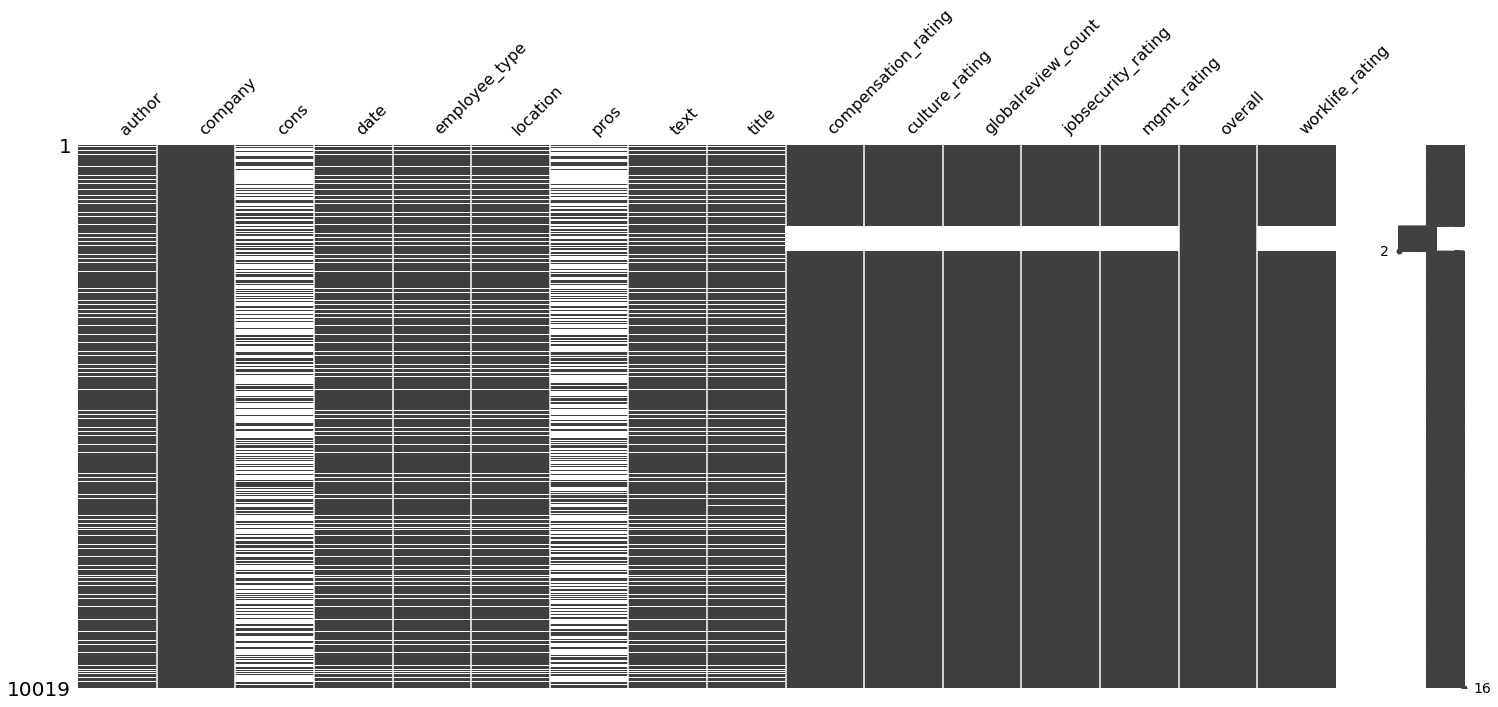

In [372]:
msno.matrix(df);
#title,author,text,location,employee_type,date seem to be missing in the same rows
#Same is noticed for the float rating values

In [373]:
#Drop rows where title,author,text,location,employee_type,date are missing
df = df.loc[df['title'].notnull(),:]
df = df.loc[df['globalreview_count'].notnull(),:]

In [374]:
#Resulting dataframe missing count
(100*df.isnull().sum()/len(df)).sort_values(ascending = False)

cons                   54.835205
pros                   52.022214
author                  0.012073
worklife_rating         0.000000
overall                 0.000000
mgmt_rating             0.000000
jobsecurity_rating      0.000000
globalreview_count      0.000000
culture_rating          0.000000
compensation_rating     0.000000
title                   0.000000
text                    0.000000
location                0.000000
employee_type           0.000000
date                    0.000000
company                 0.000000
dtype: float64

In [375]:
def clean_data(df):
    df['year'] = df['date'].apply(lambda x: x.split()[2]).astype('int64')
    df['month'] = df['date'].apply(lambda x: x.split()[0])
    df['day_of_month'] = df['date'].apply(lambda x: x.split()[1].strip(',')).astype('int64')
    df['datetime'] = df['date'].apply(lambda x: pd.to_datetime(x))
    df['weekday'] = df['datetime'].apply(lambda x: calendar.day_name[x.weekday()])
    df = df.drop(['datetime'], axis = 1)
    
    df['state'] = df['location'].apply(lambda x:[x.strip() for x in x.split(',')][1:])
    
    df['city'] = df['location'].apply(lambda x:[x.strip() for x in x.split(',')][0])

    df['employee_type'] = df['employee_type'].apply(lambda x: s[s.find("(")+1:s.find(")")-9])
    
    df['global_review_count'] = df['globalreview_count'].\
                apply(lambda x: [int(x.replace(',','')) for x in x.split() if (x.isalpha() == False)][0])
    
    return df

In [376]:
df = clean_data(df)

In [377]:
df.head(10)

,author,company,cons,date,employee_type,location,pros,text,title,compensation_rating,...,mgmt_rating,overall,worklife_rating,year,month,day_of_month,weekday,state,city,global_review_count
0,"Sales and Marketing, Sales Support Associate",Berkshire Hathaway,no room for growth,"April 23, 2013",Former,"New York, NY","helpful, energetic and friendly working enviro...",Learned to grow into a leadership role and men...,Motivating Workplace,3.8,...,3.9,4.1,4.0,2013,April,23,Tuesday,[NY],New York,104
2,Realtor,Berkshire Hathaway,NaN,"September 26, 2018",Former,"Bonita Springs, FL",NaN,Berkshire is the top real estate company in th...,Top Company,3.8,...,3.9,4.1,4.0,2018,September,26,Wednesday,[FL],Bonita Springs,104
3,Assistant,Berkshire Hathaway,NaN,"September 3, 2018",Former,"Moreland Hills, OH",Great hours. Good people.,Working at Berkshire Hathaway taught me what i...,What I learned,3.8,...,3.9,4.1,4.0,2018,September,3,Monday,[OH],Moreland Hills,104
4,UPS Driver Helper,Berkshire Hathaway,Takes a toll on Your body,"August 22, 2018",Former,"Omaha, NE",Its a workout,Sometimes when i worked there i felt like i wa...,Can be fun and competitive,3.8,...,3.9,4.1,4.0,2018,August,22,Wednesday,[NE],Omaha,104
5,SALES COORDINATOR SHAW INDUSTRIES A DIVISION,Berkshire Hathaway,no advancement,"August 15, 2018",Former,"Monument, CO",Pay/benefits are good,People are friendly...hard to advance though. ...,Daily Job,3.8,...,3.9,4.1,4.0,2018,August,15,Wednesday,[CO],Monument,104
6,Senior Industrial Hygiene and Safety Leader,Berkshire Hathaway,"Health care, no long term disability","August 14, 2018",Former,"Cleveland, TN",We are all in this together and a family type ...,I like all the people I work with and for. Not...,I've worked for my company for 24 years and th...,3.8,...,3.9,4.1,4.0,2018,August,14,Tuesday,[TN],Cleveland,104
7,Data Entry,Berkshire Hathaway,Certified and relaxed healthcare,"July 13, 2018",Former,"Omaha, NE",Free lunches,The Hiring manager to the BerkshirehathawayINC...,Cool and well relaxed,3.8,...,3.9,4.1,4.0,2018,July,13,Friday,[NE],Omaha,104
8,REALTOR,Berkshire Hathaway,NaN,"July 2, 2018",Former,"York, PA",NaN,Working with berkshire hathaway was in a way g...,It is what you make it!,3.8,...,3.9,4.1,4.0,2018,July,2,Monday,[PA],York,104
9,assistant in residential real estate,Berkshire Hathaway,The hours could be extremely long and the pres...,"June 26, 2018",Former,"Newport Beach, CA","Worked independently, and set my own schedule....",Originally worked as an real estate agent in p...,Opportunity to work independently but with in ...,3.8,...,3.9,4.1,4.0,2018,June,26,Tuesday,[CA],Newport Beach,104
10,Assistant Property Manager,Berkshire Hathaway,Lower commissions than what I was used to,"June 17, 2018",Former,"Raleigh, NC",Free travel and training,I loved the atmosphere and how everyday was so...,Productive and fun,3.8,...,3.9,4.1,4.0,2018,June,17,Sunday,[NC],Raleigh,104
